In [1]:
#Neural network with pytorch

In [68]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import torch
import helper

In [69]:
##run this cell
from torchvision import datasets, transforms

#define transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),])
#download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [70]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


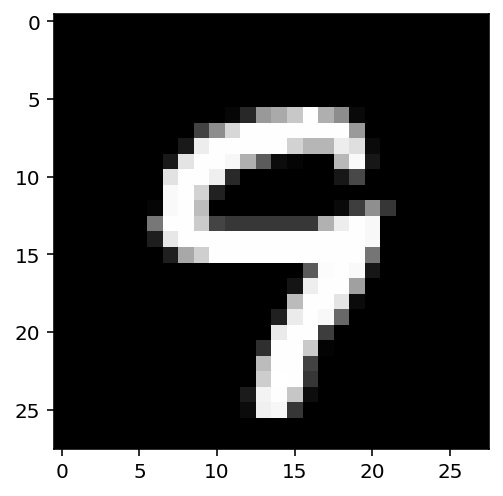

In [71]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [72]:
def activation(x):
    return 1 / (1 + torch.exp(-x))
#flatten the input images
inputs = images.view(images.shape[0], -1)

#create the parameters
W1 = torch.randn(784, 256)
B1 = torch.randn(256)

W2 = torch.randn(256, 10)
B2 = torch.randn(10)

h = activation(torch.mm(inputs, W1) + B1)
output = torch.mm(h, W2) + B2

print(output)

tensor([[-7.7894e+00, -6.4009e+00, -1.2032e+00,  3.3208e+01,  1.5411e+01,
         -1.6009e+01,  2.8526e+01, -1.8857e+00,  2.2676e+01, -1.0572e+01],
        [-1.4069e+01, -6.6348e+00,  3.2031e+00,  3.3906e+01,  1.3277e+01,
         -1.1147e+00,  1.6310e+01, -1.4007e+01,  2.5959e+01, -4.6453e+00],
        [-5.1540e+00, -5.1916e+00,  1.5175e+01,  3.3225e+01,  9.9161e+00,
         -7.5240e+00,  2.8951e+01, -5.6095e+00,  2.6264e+01, -1.1257e+01],
        [-1.6972e+00, -1.1360e+01,  9.4419e+00,  3.2076e+01,  2.1302e+01,
         -5.9221e+00,  2.7948e+01, -5.0664e+00,  2.2262e+01, -8.9525e+00],
        [-7.2677e+00, -5.9146e+00,  1.1516e+01,  2.6289e+01,  8.0718e+00,
         -4.9547e+00,  2.9942e+01, -4.5023e+00,  2.6000e+01, -2.2622e+01],
        [-1.2676e+01, -1.2402e+01,  1.4803e+01,  2.3379e+01,  1.5698e+01,
          6.0193e+00,  2.4609e+01, -7.0626e+00,  1.8954e+01, -1.3751e+01],
        [-8.2826e+00, -7.4603e+00,  1.4074e+01,  3.4971e+01,  1.0948e+01,
          1.0164e+01,  2.6920e+0

In [73]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(output)

print(probabilities.shape)
print(probabilities.sum(dim = 1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [74]:
#Building networks with Pytorch

In [75]:
from torch import nn

In [76]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #inputs to hidden layer using linear transformation
        self.hidden = nn.Linear(784, 256)
        #output layer
        self.output = nn.Linear(256, 10)
        
        #define sigmoid activation, softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    def forward (self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [77]:
#check the whether network is working or not
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [78]:
#define network more precisely using torch.nn.functional

In [79]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.hidden = nn.Linear(256, 0)
        
        
    def forward(self,x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.ouput(x), dim=1)
        
        return x

In [80]:
modell = Network()
modell

Network(
  (hidden): Linear(in_features=256, out_features=0, bias=True)
)

In [81]:
#Build Network 

In [82]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
modelll = Network()
modelll

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [83]:
#Initialize weights and bias

In [84]:
print(modelll.fc1.weight)
print(modelll.fc1.bias)

Parameter containing:
tensor([[ 0.0128,  0.0010, -0.0266,  ..., -0.0278, -0.0308, -0.0160],
        [-0.0342,  0.0155,  0.0310,  ...,  0.0324,  0.0134,  0.0152],
        [ 0.0074,  0.0063, -0.0186,  ..., -0.0339, -0.0111,  0.0237],
        ...,
        [ 0.0303,  0.0311, -0.0053,  ..., -0.0339, -0.0129, -0.0130],
        [ 0.0151,  0.0278,  0.0163,  ...,  0.0347,  0.0116, -0.0201],
        [-0.0148,  0.0285,  0.0198,  ..., -0.0034, -0.0221,  0.0161]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0265, -0.0318,  0.0067, -0.0026,  0.0213, -0.0316, -0.0332, -0.0014,
         0.0068,  0.0236,  0.0223, -0.0040,  0.0210, -0.0202,  0.0349, -0.0021,
        -0.0101, -0.0190, -0.0023, -0.0031,  0.0065,  0.0192,  0.0036,  0.0316,
        -0.0087,  0.0229,  0.0237, -0.0043, -0.0249, -0.0078,  0.0279,  0.0332,
        -0.0107,  0.0139,  0.0276, -0.0215, -0.0116,  0.0289, -0.0066, -0.0222,
         0.0060,  0.0054, -0.0043, -0.0075, -0.0015,  0.0146, -0.0056,  0.0200,
         0.0246

In [85]:
#set bias to all zeros
modelll.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
modelll.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0154, -0.0087,  0.0055,  ..., -0.0049, -0.0169, -0.0034],
        [-0.0016,  0.0031,  0.0063,  ...,  0.0022, -0.0147, -0.0089],
        [-0.0104, -0.0020,  0.0091,  ...,  0.0056,  0.0117, -0.0054],
        ...,
        [-0.0081,  0.0065, -0.0089,  ..., -0.0056,  0.0032, -0.0213],
        [-0.0049,  0.0004, -0.0179,  ...,  0.0085, -0.0087, -0.0034],
        [-0.0044, -0.0245,  0.0024,  ..., -0.0090,  0.0042,  0.0023]])

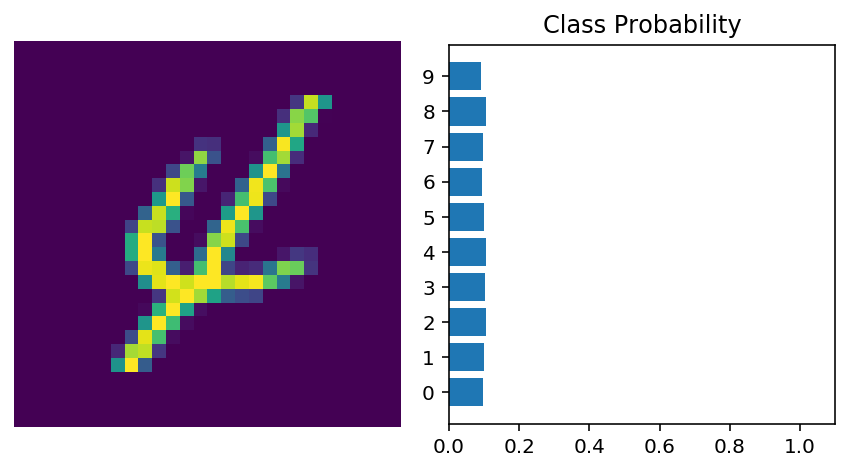

In [88]:
#Forward pass
#grap some data
dataiter = iter(trainloader)
images.labels = dataiter.next()

#resize images into 1D vector
images.resize_(64, 1, 784)

#forward pass through the Network
img_idx = 0
ps = modelll.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [89]:
#using nn.Sequential

Sequential(
  (0): Linear(in_features=784, out_features=138, bias=True)
  (1): ReLU()
  (2): Linear(in_features=138, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


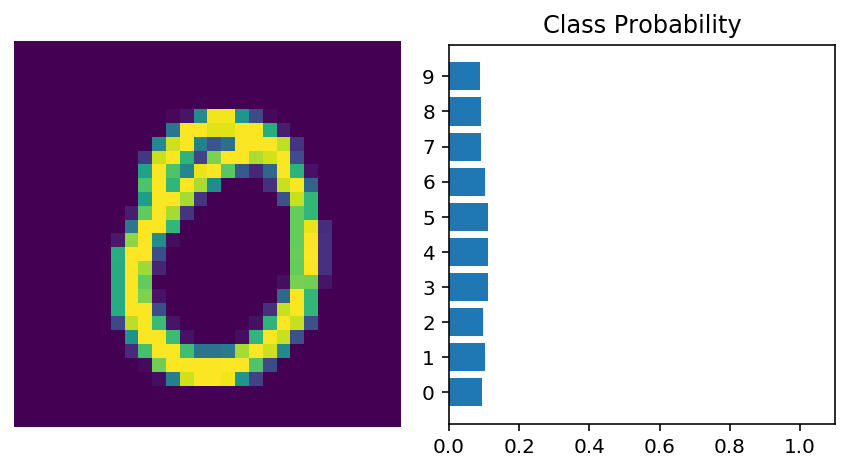

In [96]:
input_size = 784
hidden_sizes = [138, 64]
output_size = 10

#Build feedforward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
                      
print(model)
                      
#forward pass through the network and print the output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [97]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=138, bias=True)


Parameter containing:
tensor([[-0.0355,  0.0079, -0.0106,  ...,  0.0194,  0.0240, -0.0110],
        [ 0.0043, -0.0126, -0.0261,  ...,  0.0342,  0.0161, -0.0209],
        [ 0.0145, -0.0012,  0.0337,  ...,  0.0016, -0.0221, -0.0071],
        ...,
        [-0.0055, -0.0333,  0.0160,  ...,  0.0021, -0.0155, -0.0157],
        [-0.0069,  0.0345,  0.0103,  ...,  0.0273, -0.0135, -0.0042],
        [-0.0051, -0.0233,  0.0005,  ..., -0.0007, -0.0237, -0.0262]],
       requires_grad=True)

In [98]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                    ('relu', nn.ReLU()),
                    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                    ('relu', nn.ReLU()),
                    ('output', nn.Linear(hidden_sizes[1], output_size)),
                    ('softmax', nn.Softmax(dim=1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=138, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=138, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [99]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=138, bias=True)
Linear(in_features=784, out_features=138, bias=True)
